In [1]:
%matplotlib inline
from __future__ import division
import numpy as np
from scipy import stats
from scipy import spatial
import gaussian
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Import training data

train = np.genfromtxt('data/train_data.csv', delimiter=',',skip_header=True)
print train[:5], train.shape

[[  40.582 -119.79    84.929]
 [  41.983 -123.6     87.388]
 [  41.85  -123.97    36.259]
 [  42.07  -123.01    84.913]
 [  41.953 -121.58    66.445]] (414, 3)


In [3]:
# Import test data

test_raw = np.genfromtxt('data/test_data.csv', delimiter=',',skip_header=True)
test = test_raw[:,1:]
print test[:5], test.shape

[[  41.988 -123.72 ]
 [  41.883 -124.13 ]
 [  41.833 -123.83 ]
 [  41.999 -121.7  ]
 [  41.928 -122.44 ]] (413, 2)


In [4]:
# Create model object from training data

kriging = gaussian.SimpleKriging(training_data=train)

In [5]:
# Return prediction means for test data from trained model

predict = kriging.predict(test_data=test, l=.5, sigma=.2)
predict[:5]

array([[ 70.94340417],
       [ 23.70437824],
       [ 49.57131344],
       [ 71.06713418],
       [ 70.69029366]])

In [6]:
# Get full bounding box
coords = np.concatenate((train[:, :-1], test), axis=0)
bounding_box = [coords[:,0].min(), coords[:,0].max(), coords[:,1].min(), coords[:,1].max()]
print bounding_box

[32.604999999999997, 42.07, -124.25, -114.48999999999999]


In [7]:
l_opt, sigma_opt, func, rmse_low = gaussian.cross_validate(train,
                                                     l_values=np.arange(0.7, 1.3, 0.05)[1:],
                                                     sigma_values=np.arange(0.16, 0.2, 0.005)[1:],
                                                     rmse_opt=1000,
                                                     k_folds=5,
                                                     cov_funcs=True)

In [8]:
print l_opt, sigma_opt, func

1.05 0.195 <function sq_exponential at 0x7f55ea4dd140>


In [9]:
results = kriging.predict(test, l_opt, sigma_opt)
indices = test_raw[:, :1]
submission_array = np.concatenate((indices, results), axis=1)

In [10]:
submission = pd.DataFrame(submission_array, columns=['id', 'mm'])
submission['id'] = submission['id'].astype(int)
submission.to_csv('solution.csv', index=False)

In [11]:
cv_split = np.array_split(train, 5)
cv_train = np.concatenate(cv_split[1:])
cv_test = cv_split[0]
kriging_cv = gaussian.SimpleKriging(cv_train)

In [12]:
cv_predict = kriging_cv.predict(cv_test[:,:-1],l=1.05, sigma=0.195)
cv_real = cv_test[:, -1:]
compare = np.concatenate((cv_real, cv_predict), axis=1)
compare

array([[  84.929     ,   86.91746237],
       [  87.388     ,   58.07707455],
       [  36.259     ,   49.55151804],
       [  84.913     ,   73.6245242 ],
       [  66.445     ,   89.11288797],
       [  71.967     ,   88.29552003],
       [  93.775     ,   81.339964  ],
       [  17.532     ,   63.60893062],
       [  50.774     ,   86.43123709],
       [  94.933     ,   89.77979798],
       [  70.036     ,   81.30642468],
       [ 102.89      ,   84.95625895],
       [  77.017     ,   75.62949433],
       [  90.166     ,   72.38487227],
       [ 102.43      ,   73.4500881 ],
       [  85.489     ,   81.00384514],
       [  92.496     ,   75.16815953],
       [  76.535     ,   79.25279359],
       [  85.877     ,   80.40513848],
       [  83.088     ,   99.87396985],
       [  69.154     ,   69.41475533],
       [  60.657     ,   78.71998601],
       [  77.721     ,   69.41795358],
       [  33.451     ,   72.31502556],
       [  59.615     ,  103.63411815],
       [  90.021     ,  1

In [13]:
simulate = kriging.simulate(bbox=bounding_box, ncells=50, l=1.05, sigma=0.195, indices=True)

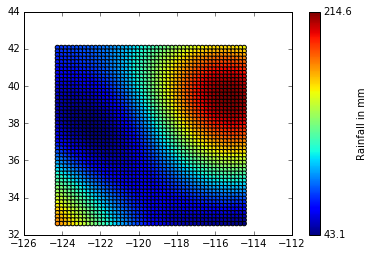

In [14]:
viz = kriging.simulate(bbox=bounding_box, ncells=50, l=5, sigma=0.2, indices=True, show_visual=True, save_visual='sim.png')

In [15]:
viz

array([[  42.07      , -114.49      ,  154.46307829],
       [  41.87683673, -114.49      ,  161.61304302],
       [  41.68367347, -114.49      ,  168.32111359],
       ..., 
       [  32.99132653, -124.25      ,  167.77856102],
       [  32.79816327, -124.25      ,  170.80263125],
       [  32.605     , -124.25      ,  173.40150248]])